#### Cross Validation + Machine Learning
- Initialize Linear Regression Model
- Cross Validation
- Fit model on training set
- R2 scores for train / test sets
- Plot Residuals vs Predictions
- Coefficient Analyis on test data of Linear Regression Model
- Manually see predictions for each film
- MAE Score

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/no_trans_base.csv')
# strd_base.head(2)
strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression_Take2/movies_with_dummies.csv')
strd_base.head(2)

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
0,The Dark Knight,152,"['Action', 'Crime', 'Drama']",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,...,0,0,0,0,0,0,0,0,1,0
1,The Hunger Games: Catching Fire,146,"['Action', 'Adventure', 'Drama']",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,...,0,0,0,0,0,0,0,0,1,0


In [3]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

### Initialize LR Model, Train/Test Split, Cross Validation

In [62]:
features_in = ['Budget_Adjust', 'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
'War', 'Western', 'PG','PG-13', 'R', 'Duration']

Y = strd_base['Gross_Adjust']
X = strd_base[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                       test_size=.2,     
                                       random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# Initialize Model
model = LinearRegression()

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 


### Cross Validation Scores
Function parameters for cross_val_score<br>
- estimator - The model object to use to fit the data
- X - The data to fit the model on
- Y - The target of the model
- scoring - The error metric to use
- cv - The number of splits to use

###### A list of one score per split

In [63]:
print(cross_val_score(model, X, Y, cv=5))

[-1.63327638 -0.07732386 -0.48675353 -1.30845023 -4.67227158]


###### Mean Score with a Standard Deviation of

In [64]:
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_root_mean_squared_error')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of -81803407.40 with a standard deviation of 43461653.53


###### Accuracy Score
The Accuracy of the model is the average of the accuracy of each fold.

In [65]:
# ValueError: continuous is not supported
# need to change a data type????

# accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
# print(accuracy)

In [66]:
# getting nan cuz code above isn't working

#get the mean of each fold 
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

### Fit model on the training set
.fit() method trains the algorithm on the training data, after the model is initialized.

In [67]:
#model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Training R^2 vs Test R^2

#### Is model overfitting?
- Train = Test (low) -- underfit
- Train = Test (high) -- good fit
- Train > Test -- overfit
- Train < Test -- outliers

#### Finding: Slight overfitting train is slightly greater than test. 

In [68]:
#X_train, X_test, y_train, y_test

r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(f'Train R^2 {r_squared_train}')
print(f'Test  R^2 {r_squared_test}')

Train R^2 0.31815682349174557
Test  R^2 0.2761488720321399


### Plot Residuals vs Predicted

Text(0.5, 1.0, 'Residuals vs. Predictions')

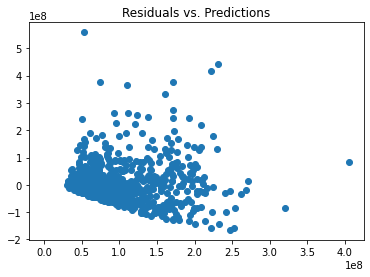

In [69]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

### Coefficient Analysis on Linear Regression Model
- Model must be fitted for it to work
- The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.

#### Coefficients on Test Set

In [71]:
test_fit = model.fit(X_test,y_test)
coefficients_tst = pd.DataFrame(test_fit.coef_,X.columns, columns=['Coefficient'])
coefficients_tst.round(2)


,Coefficient
Budget_Adjust,0.39
Action,-20658701.63
Adventure,19793585.00
Animation,-54468082.93
Biography,-57640257.49
Comedy,12575077.35
Crime,-10495540.63
Drama,-28094114.77
Family,0.00
Fantasy,-7649883.02


#### Intercept for test

In [82]:
#notes from previous data point:
#every movie starts out losing 4.7 million dollars. 
#Take budget and multiply by .5 and add it to -47MM
# When at zero Duration add 934,000 per minute. 
#intercept is -47MM. If all things zero this is what you get
# you can put formula into excel and calculate predciton. 

test_fit.intercept_

-48475925.56400858

### Get Predictions

In [79]:
predictions = model.predict(X_test)
#predictions

##### Manually See Predictions by Film

In [75]:
#Visual Review
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_comparison = pd.merge(df_results, strd_base, how="inner", left_on="Actual", right_on='Gross_Adjust')
df_comparison.columns

Index(['Actual', 'Predicted', 'Title', 'Duration', 'Genre', 'Rating', 'Gross',
       'Director', 'Lead', 'Year', 'Budget_Update', 'Budget_Adjust',
       'Gross_Adjust', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'PG', 'PG-13', 'R'],
      dtype='object')

In [76]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

### See Predictions by Row - Fun! 

In [80]:
#manually shows comparison. Change out features to see how prediction changes. 
pred_df = df_comparison[['Title','Predicted', 'Actual','Budget_Adjust', 'Action','Adventure', 
                         'Animation', 'Biography', 'Comedy', 'Crime', 'Drama','Family', 'Fantasy', 
                         'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
                         'War', 'Western', 'PG','PG-13', 'R', 'Duration']]
pd.options.display.float_format = '{:,.2f}'.format

In [81]:
pred_df

,Title,Predicted,Actual,Budget_Adjust,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Sport,War,Western,PG,PG-13,R,Duration
0,Quarantine,"68,594,099.14","39,883,509.80","15,102,622.80",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,89
1,Us,"83,410,413.03","185,566,707.00","21,197,933.20",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,116
2,Nowhere to Run,"-1,041,239.08","41,611,240.80","28,128,373.70",1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,94
3,2 Guns,"100,108,480.40","87,947,740.10","70,953,738.20",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,109
4,Space Cowboys,"177,326,549.22","142,345,796.70","102,282,520.30",1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Absence of Malice,"167,186,907.49","121,385,020.90","35,771,617.20",0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,116
221,The Phantom of the Opera,"73,544,901.50","73,544,901.50","100,412,387.50",0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,143
222,The November Man,"75,232,779.24","28,592,316.30","17,169,125.10",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,108
223,The Lazarus Effect,"54,233,951.43","29,495,884.30","3,772,729.40",0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,83


#### MAE Score

In [83]:
actual = pred_df['Actual']
pred = pred_df['Predicted']

mae(actual, pred)

46825271.29220527